Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
df_Toyoto_Corrola = pd.read_csv('Toyoto_Corrola.csv') 
df_Toyoto_Corrola 

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [4]:
df_Toyoto_Corrola.head()


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [5]:
df_Toyoto_Corrola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
df_Toyoto_Corrola.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

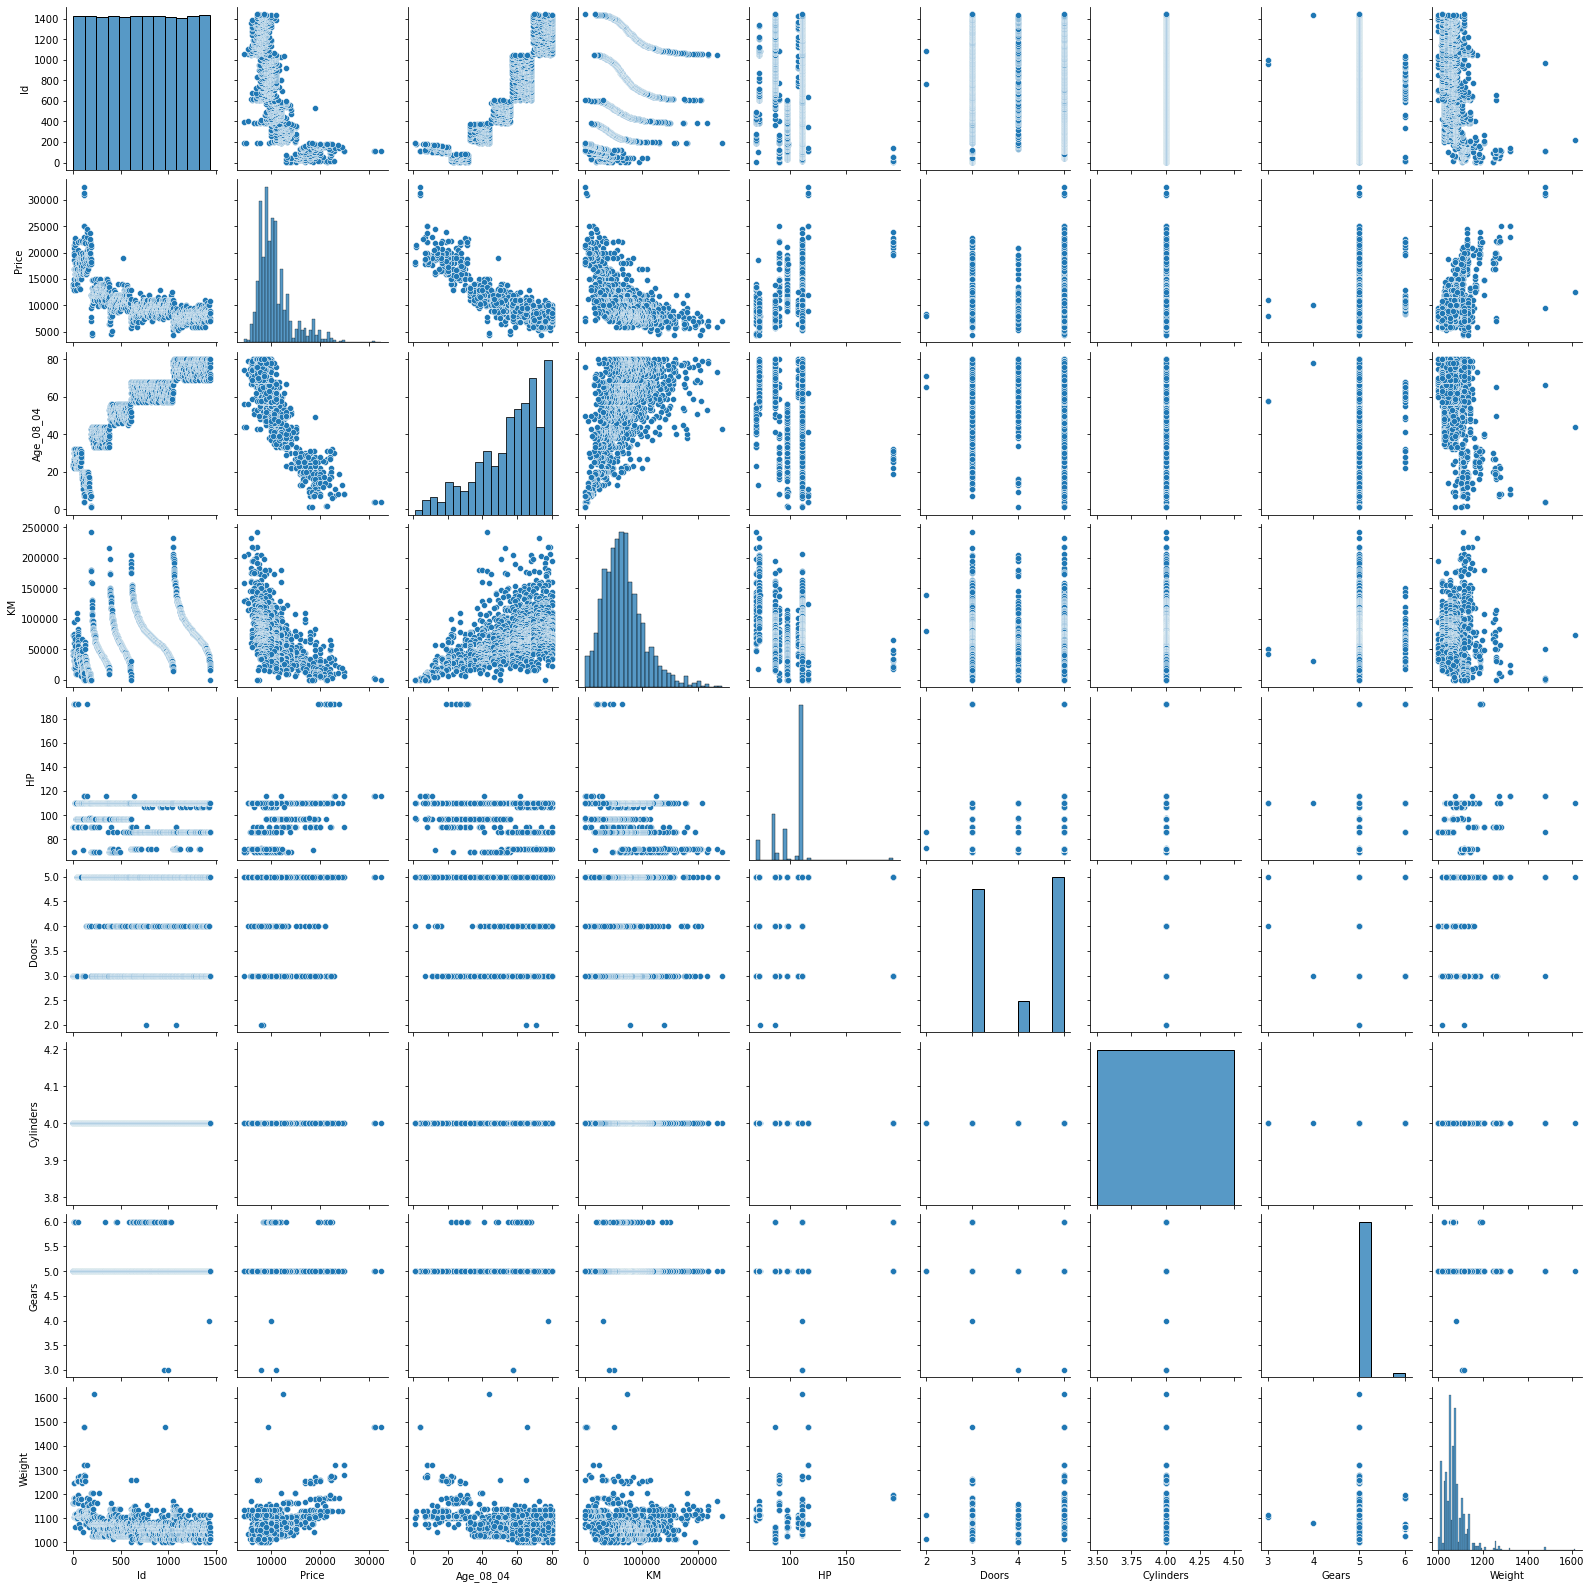

In [7]:
#EDA Visualization:
sns.pairplot(df_Toyoto_Corrola)

<AxesSubplot:xlabel='Price', ylabel='Density'>

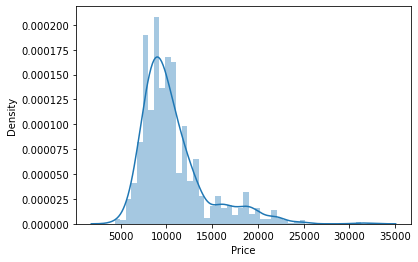

In [8]:
sns.distplot(df_Toyoto_Corrola['Price'])


<AxesSubplot:>

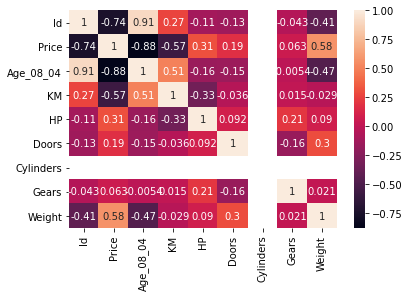

In [9]:
sns.heatmap(df_Toyoto_Corrola.corr(),annot=True)

In [10]:
#Training Model:
X=df_Toyoto_Corrola[['Id', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight']]
Y=df_Toyoto_Corrola['Price']

In [11]:
#Train test split:
from sklearn.model_selection import train_test_split



In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [13]:
#Creating and training model:
from sklearn.linear_model import LinearRegression

In [14]:
Xm=LinearRegression()
Xm.fit(X,Y)

LinearRegression()

In [15]:
#Model Evalution:
print(Xm.intercept_)

-6309.091778544447


In [16]:
coef=pd.DataFrame(Xm.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
Id,0.845958
Age_08_04,-142.870910
KM,-0.017302
HP,29.197402
Doors,-6.191827
Cylinders,0.000000
Gears,676.746940
Weight,17.966373


In [17]:
#Predcition
Prediction=Xm.predict(X_test)

<AxesSubplot:xlabel='Price'>

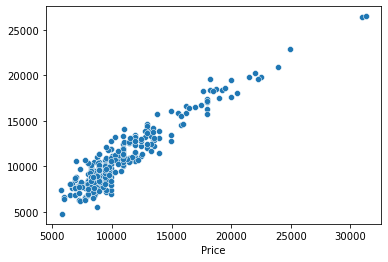

In [18]:
#Data Visualization:
sns.scatterplot(Y_test,Prediction)

<AxesSubplot:xlabel='Price', ylabel='Density'>

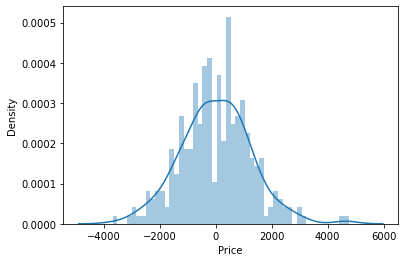

In [19]:
sns.distplot((Y_test-Prediction),bins=50)

In [20]:
from sklearn import metrics

In [21]:
result1=print('MAE:',metrics.mean_absolute_error(Y_test,Prediction))
result2=print('MSE:',metrics.mean_squared_error(Y_test,Prediction))
result3=print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Prediction)))
     

MAE: 989.5227846264685
MSE: 1591282.6940536217
RMSE: 1261.460540030334
